In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import torch
from torch_geometric.data import Data

In [2]:
df = pd.read_csv("data/sider.csv")
df.columns
df.head()
df.shape

(1427, 28)

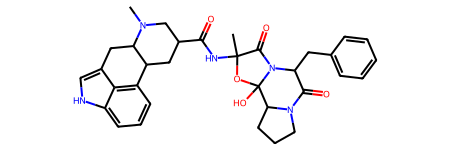

In [3]:
smi = df["smiles"][500]
mol = Chem.MolFromSmiles(smi)
mol

In [4]:
edges = []
for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    edges.extend([(i,j), (j,i)])
edge_index = list(zip(*edges))

In [5]:
# Atomic number and chirality for atoms
# Bond type and bond direction for bonds
def atom_feature(atom):
    return [atom.GetAtomicNum(),
           atom.GetChiralTag()]
def bond_feature(bond):
    return [bond.GetBondType(),
           bond.GetBondDir()]

In [6]:
node_features = [atom_feature(a) for a in mol.GetAtoms()]
edge_features = [bond_feature(b) for b in mol.GetBonds()]

In [7]:
g = Data(edge_index=torch.LongTensor(edge_index),
         x=torch.FloatTensor(node_features),
         edge_attr=torch.FloatTensor(edge_features),
         smiles=smi,
         mol=mol)

In [8]:
g.x

tensor([[6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.]])

In [9]:
g.edge_attr

tensor([[ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.]])

In [10]:
print(len(g.x))
print(len(g.edge_attr))
print(g.edge_index)
# The first row of the tensor contains the origin of the bond, and second the target
print(g.edge_index.shape)

43
50
tensor([[ 0,  1,  1,  2,  2,  3,  2,  4,  4,  5,  5,  6,  6,  7,  6,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 13, 15,  5, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22,  1, 23, 23, 24, 24, 25, 24, 26, 26, 27,
         27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36,
         36, 37, 37, 38, 38, 39, 29, 40, 40, 41, 40, 42, 14,  1, 13,  4, 12,  8,
         22, 17, 41, 26, 38, 28, 39, 31, 39, 34],
        [ 1,  0,  2,  1,  3,  2,  4,  2,  5,  4,  6,  5,  7,  6,  8,  6,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 13, 16,  5, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23,  1, 24, 23, 25, 24, 26, 24, 27, 26,
         28, 27, 29, 28, 30, 29, 31, 30, 32, 31, 33, 32, 34, 33, 35, 34, 36, 35,
         37, 36, 38, 37, 39, 38, 40, 29, 41, 40, 42, 40,  1, 14,  4, 13,  8, 12,
         17, 22, 26, 41, 28, 38, 31, 39, 34, 39]])
torch.Size([2, 100])


In [11]:
# Lets see without Torch
import numpy as np
from rdkit import Chem

edge_index = []
edge_features = []
node_features = []

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    
    # Building edge index
    edge_index.append([i, j])
    edge_index.append([j, i])

    # Extracting bond features
    bond_feats = [
        bond.GetBondType(),
        bond.GetBondDir()  
    ]
    edge_features.extend([bond_feats, bond_feats])  # Adding features for both directions of the edge

for atom in mol.GetAtoms():
    # Extracting node features
    atom_feats = [
        atom.GetAtomicNum(),
        #atom.GetChiralTag()   #For now we do without this; Seems to be 0 anyways for majority of cases
    ]
    node_features.append(atom_feats)

# Convert to numpy arrays
edge_index = (np.array(edge_index).T).astype(np.float32)  
edge_features = np.array(edge_features).astype(np.float32)
node_features = np.array(node_features).astype(np.float32)
print(edge_features)
print(node_features)
print(edge_index)

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]

In [12]:
from rdkit import Chem
import numpy as np

num_atoms = mol.GetNumAtoms()
# Adjacency matrix
A = np.zeros((num_atoms, num_atoms), dtype=int)

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    
    
    A[i, j] = 1
    A[j, i] = 1  

np.fill_diagonal(A, 1) # With this we have Ã = A + I
print(A)
print(A.shape)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 1]]
(43, 43)


In [13]:
W = np.random.rand(num_atoms, num_atoms)
output = (A @ node_features).T @ W
np.maximum(0,output).T # Applying ReLU; This is what is getting used for the next iteration?
# I need to actually include edge features, and also update them

array([[503.80628964],
       [410.09312353],
       [509.39112894],
       [420.38901156],
       [384.13972326],
       [419.41494118],
       [437.27843286],
       [499.49690333],
       [490.22406493],
       [408.86293763],
       [464.26234719],
       [437.48137916],
       [433.70059455],
       [423.39222958],
       [505.36226212],
       [473.20540523],
       [432.50249999],
       [451.54096986],
       [492.66780966],
       [413.59770502],
       [368.02644392],
       [517.77553479],
       [420.33558317],
       [482.26854516],
       [438.55332546],
       [469.11828476],
       [354.46947976],
       [483.96354532],
       [485.91282765],
       [439.99372384],
       [431.15830912],
       [480.03158812],
       [437.32819026],
       [509.21677386],
       [419.01952999],
       [376.51337604],
       [475.36927684],
       [402.59615402],
       [481.65278667],
       [474.40401236],
       [410.4189878 ],
       [467.35539259],
       [452.72774354]])

In [14]:
# Perhaps we can actually have the adjacency matrix already including information about the edges
# such that we don't need to actually do the aggregating step (H = X + E) between node features,
# and edge features (as this in matrix form is complicated), and just revert to dot product
# between last H and A containing edge information. We'll also update this A.

from rdkit import Chem
import numpy as np

node_features = []
for atom in mol.GetAtoms():
    # Extracting node features
    atom_feats = [atom.GetAtomicNum()]
    node_features.append(atom_feats)
H = np.array(node_features).astype(np.float32)

# Using only information about bond type for the respetive adjancency matrix
A = np.zeros((len(H), len(H)), dtype=float)

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType() 
    
    A[i, j] = bond_type
    A[j, i] = bond_type  

np.fill_diagonal(A, 1) # diagonal with 1's; Ã = A + I
print(A)
print(H)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
[[6.]
 [6.]
 [6.]
 [8.]
 [7.]
 [6.]
 [6.]
 [8.]
 [7.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [8.]
 [8.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [8.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [6.]
 [6.]]


In [15]:
W = np.random.rand(len(H), len(H))
output = (A @ H).T @ W
output_1 = np.maximum(0,output).T #Applying ReLU, might want to try sigmoid to place values between 0 and 1
print(output_1)

[[1346.02919922]
 [1492.94002962]
 [1667.29518813]
 [1272.4632443 ]
 [1488.39458135]
 [1551.36517955]
 [1564.82499513]
 [1692.88672352]
 [1363.20120921]
 [1623.68856282]
 [1668.27351393]
 [1443.13135776]
 [1727.29797224]
 [1501.1101644 ]
 [1590.54723416]
 [1307.07922584]
 [1649.52962291]
 [1704.69836797]
 [1663.18573831]
 [1777.99824819]
 [1527.66783855]
 [1483.80089394]
 [1247.95332203]
 [1556.56154392]
 [1351.5876636 ]
 [1648.38634054]
 [1665.77204727]
 [1444.16704843]
 [1666.5746926 ]
 [1481.28137368]
 [1396.37571517]
 [1832.20563028]
 [1517.16671028]
 [1893.52967253]
 [1678.20909922]
 [1652.18728289]
 [1073.56839497]
 [1567.93110079]
 [1489.7775413 ]
 [1500.9460859 ]
 [1510.72018969]
 [1095.30149944]
 [1566.20100352]]


In [16]:
A2 = A * (output_1 + output_1.T) # The idea is that at each entry of A
# for a certain edge between node i and j, we have information added based on past A
# and the node representations for i and j
# The update of A should be done after the update of H (node representations)
print(A2)
output_2 = np.maximum(0, (A2 @ output_1).T @ W)
print(output_2) #Yeah, need sigmoid ..

[[2692.05839843 2838.96922883    0.         ...    0.
     0.            0.        ]
 [2838.96922883 2985.88005923 3160.23521775 ...    0.
     0.            0.        ]
 [   0.         3160.23521775 3334.59037626 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 3021.44037937
  2606.02168912 3076.9211932 ]
 [   0.            0.            0.         ... 2606.02168912
  2190.60299888    0.        ]
 [   0.            0.            0.         ... 3076.9211932
     0.         3132.40200703]]
[[1.08248099e+09 1.19215600e+09 1.34276847e+09 1.00874677e+09
  1.17638318e+09 1.19768386e+09 1.26332913e+09 1.36134748e+09
  1.10370802e+09 1.31170276e+09 1.34116754e+09 1.18220296e+09
  1.38440511e+09 1.22278936e+09 1.30961903e+09 1.06100366e+09
  1.37655198e+09 1.38564890e+09 1.31033864e+09 1.47271477e+09
  1.25041852e+09 1.20751521e+09 1.00661709e+09 1.25929505e+09
  1.03360319e+09 1.33477732e+09 1.32887139e+09 1.14426269e+09
  1.32498355e+09 1.18742342

In [17]:
from Net import *
class CombinedMeanPooling(Layer):
    def __init__(self, transformed_vector_size):
        self.transformed_vector_size = transformed_vector_size

    def forward(self, node_vector, adjacency_matrix):
        pool_size = len(node_vector) // self.transformed_vector_size
        pooled_node_vector = [np.mean(node_vector[i * pool_size: (i + 1) * pool_size])
                              for i in range(self.transformed_vector_size)]

        pooled_adjacency_matrix = np.zeros((self.transformed_vector_size, self.transformed_vector_size))
        for i in range(self.transformed_vector_size):
            for j in range(self.transformed_vector_size):
                submatrix = adjacency_matrix[i * pool_size: (i + 1) * pool_size,
                                            j * pool_size: (j + 1) * pool_size]
                pooled_adjacency_matrix[i, j] = np.mean(submatrix)

        return pooled_node_vector, pooled_adjacency_matrix


    def backward(self):
        #Given that this is a first layer
        #And we have no learnable parameters, it shouldn't matter
        # to actually specify a backward pass
        pass
        


In [18]:
node_vector_size = len(node_features)
transformed_vector_size = 8
pool_size = 2


mean_pooling = CombinedMeanPooling(transformed_vector_size)
pooled_node_vector, pooled_adjacency_matrix = mean_pooling.forward(node_features, A)

print("Pooled Node Vector:")
print(pooled_node_vector)

print("\nPooled Adjacency Matrix:")
print(pooled_adjacency_matrix)
print(len(node_features))

Pooled Node Vector:
[6.6, 6.6, 6.4, 6.4, 6.2, 6.4, 6.2, 6.0]

Pooled Adjacency Matrix:
[[0.6  0.04 0.08 0.   0.04 0.   0.   0.  ]
 [0.04 0.6  0.08 0.04 0.   0.   0.   0.  ]
 [0.08 0.08 0.52 0.04 0.   0.   0.   0.  ]
 [0.   0.04 0.04 2.2  0.96 0.   0.   0.  ]
 [0.04 0.   0.   0.96 2.2  0.12 0.   0.  ]
 [0.   0.   0.   0.   0.12 0.44 0.04 0.04]
 [0.   0.   0.   0.   0.   0.04 3.16 1.44]
 [0.   0.   0.   0.   0.   0.04 1.44 4.04]]
43


In [19]:
from rdkit import Chem
import pandas as pd


data = pd.read_csv("data/sider.csv")

num_atoms_list = []
for mol_str in data["smiles"]:  
    mol = Chem.MolFromSmiles(mol_str)  
    if mol is not None:
        num_atoms = mol.GetNumAtoms()
        num_atoms_list.append(num_atoms)

average_num_atoms = sum(num_atoms_list) / len(num_atoms_list)

min_num_atoms = min(num_atoms_list)
molecules_with_min_atoms = [idx for idx, num_atoms in enumerate(num_atoms_list) if num_atoms == min_num_atoms]

print(f"Average number of atoms across all molecules: {average_num_atoms}")
print(f"Molecules with the lowest number of atoms ({min_num_atoms}): {molecules_with_min_atoms}")
# Might choose transformed_size for mean pooling as 8
# Will not consider any molecule with less than 8 atoms

[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors


Average number of atoms across all molecules: 33.641205325858444
Molecules with the lowest number of atoms (1): [41, 50, 51, 53, 59, 126, 136, 139, 148, 251, 424, 734, 740, 1300, 1311, 1352, 1353, 1354, 1355, 1356, 1361, 1363, 1364, 1365, 1366]


In [20]:
data = pd.read_csv("data/sider.csv")

total_molecules = len(data)
eliminated_molecules = 0

for mol_str in data["smiles"]:  
    mol = Chem.MolFromSmiles(mol_str)  
    if mol is not None:
        atom_count = mol.GetNumAtoms()

    
    if atom_count < 8:
        eliminated_molecules += 1

remaining_molecules = total_molecules - eliminated_molecules
print(remaining_molecules) #We'll use these ones

[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:15] WARNING: not removing hydrogen atom without neighbors
[20:35:16] WARNING: not removing hydrogen atom without neighbors
[20:35:16] WARNING: not removing hydrogen atom without neighbors
[20:35:16] WARNING: not removing hydrogen atom without neighbors
[20:35:16] WARNING: not removing hydrogen atom without neighbors
[20:35:16] WARNING: not removing hydrogen atom without neighbors


1352


In [21]:
# Testing GIN layer
input_size = 5  
H = np.random.randn(input_size)  
A = np.random.randn(input_size, input_size)

# Initialize GIN layer
gin_layer = GIN(input_size)

# Perform forward pass
H_output, A_output = gin_layer.forward(H, A)


print("H_output:\n", H_output)
print("A_output:\n", A_output)

TypeError: GIN.forward() takes 2 positional arguments but 3 were given

In [ ]:
H = np.array([1, 2, 7, 5, 5, 6, 9, 9, 9, 10, 11, 12, 13, 14, 15])
A = np.random.rand(15, 15)
pooling_layer = Mean_pooling(size=10)

pooled_H, pooled_A = pooling_layer.forward(H, A)

print("Pooled H:", pooled_H)
print("Pooled A:", pooled_A)

In [ ]:
def preprocess_dataset(dataset, task):
    processed_data = []
    for index, molecule in dataset.iterrows():
        mol = Chem.MolFromSmiles(molecule["smiles"]) 
        node_features = []
        for atom in mol.GetAtoms():
            atom_feats = [atom.GetAtomicNum()]
            node_features.append(atom_feats)
        H = np.array(node_features).astype(np.float32)

        A = np.zeros((len(H), len(H)), dtype=float)
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            bond_type = bond.GetBondType()
            A[i, j] = bond_type
            A[j, i] = bond_type  
        np.fill_diagonal(A, 1)

        task1 = molecule[task]
        

        processed_data.append({"features": {"H": H, "A": A}, "label": task1})


    return processed_data


In [ ]:
#dataset = pd.read_csv("data/filtered_sider.csv")
#preprocess_dataset(dataset, "Hepatobiliary disorders")

In [ ]:
from sklearn.model_selection import train_test_split

def SGD(network, loss, loss_prime, dataset, task, epochs = 10,
       learning_rate = 0.1, batch_size = 10, verbose = True):

    data_processed = preprocess_dataset(dataset, task) 
    
    features = [(entry["features"]["H"], entry["features"]["A"]) for entry in data_processed]
    labels = [entry["label"] for entry in data_processed]

    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)
    test_features, eval_features, test_labels, eval_labels = train_test_split(test_features, test_labels, test_size=0.5)


    for e in range(epochs):
        train_loss = 0
        for i in range(0, len(train_features), batch_size):
            x_batch = train_features[i: i + batch_size]
            y_batch = train_labels[i: i + batch_size]

            batch_loss = 0
            for x, y in zip(x_batch, y_batch):
                # Do forward pass
                output = predict(network, x)
                batch_loss += loss(y, output) / len(x_batch)

                # Do backward pass
                batch_grad = loss_prime(y, output) / len(x_batch)
                for layer in reversed(network):
                    batch_grad = layer.backward(batch_grad, learning_rate)
            
            train_loss += batch_loss

        train_loss /= len(train_features)

        if verbose:
            print(f"Epoch {e + 1}/{epochs}, Training Loss = {train_loss}")


    test_loss = 0
    for x, y in zip(test_features, test_labels):
        output = predict(network, x)
        test_loss += loss(y, output)
    test_loss /= len(test_features)
    print(f"Test Loss: {test_loss}")

    eval_loss = 0
    for x, y in zip(eval_features, eval_labels):
        output = predict(network, x)
        eval_loss += loss(y, output)
    eval_loss /= len(eval_features)
    print(f"Evaluation Loss: {eval_loss}")
        

In [28]:
H = np.random.randn(4)
W = np.random.randn(4,4)
print(H)
print(W)
H@W

[ 0.89148294  0.07097325 -0.22317676 -0.54209579]
[[ 0.54687359  0.72024157 -0.69797479  0.02824952]
 [ 0.43576492  0.74762059 -0.96851301 -1.15612386]
 [ 0.27337652 -1.29178729 -0.80503128 -1.4327035 ]
 [ 0.579351   -0.57224518 -1.89058973  0.44073765]]


array([0.1433811 , 1.29365274, 0.51357389, 0.0239542 ])